# MNIST

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [2]:
import seaborn as sns
import copy

def load_data(save_path):
    datas = list()
    path_list = glob.glob(save_path)
    data_temp_ = get_concat_glob(path_list)
    # print()
    data_temp_["a1"] = data_temp_["a1"] * 100
    data_temp_["a3"] = data_temp_["a3"] * 100
    data_temp_['Distribution'] = data_temp_['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    # data_temp['Mode'] = data_temp['Mode'] .map({'fedavg': "FedAvg", 
    #                                             'fedprox': "FedProx", 
    #                                             'scaffold': "Scaffold",  
    #                                             'feddyn': "FedDyn", 
    #                                             # 'G11': "FedGN",
    #                                            })
    # print(data_temp["Mode"].unique())
    # sk = ["Balanced IID partition", "Balanced Dirichlet partition (α=0.3)"]
    # data_temp = data_temp.set_index('Distribution').loc[sk].reset_index()
    # sk = ['FedAvg', 'FedProx', 'Scaffold', 'FedDyn']
    # data_temp = data_temp.set_index('Mode').loc[sk].reset_index()
    # print(data_temp.size)
    return data_temp_

# data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")

In [40]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):
        data = pd.read_csv(path)
        data["Mode"] = data["mode"]

        if "ortho" in path: continue
        if "GNStop" in path: continue
        if "G15" in path: continue
        if "L10" in path: continue
        if "SWA" in path: continue
        if "FConly" in path: continue
        if "ortFC" in path: continue
        if "FCs" in path: continue
        if "w1b1" in path: continue
        if "w1b1" in path: continue
        elif "w1" in path: continue
        elif "b1" in path: continue
        if "fc" in path:
            continue
        elif "ec" in path:
            continue
        elif "FCs" in path and "Mean5" not in path:
            continue
        if "PCOS" in path: continue
        if "BN" in path and "noBN" not in path: continue

        data = pd.read_csv(path)
        data["Mode"] = data["mode"]

        if "Mean1-" in path:
            # data["Mode"] += "_M1"
            data["Mean"] = "Axis 1"
        elif "Mean2-" in path:
            # data["Mode"] += "_M2"
            data["Mean"] = "Axis 0"
        elif "Mean3-" in path: continue
        elif "Mean4-" in path: continue
        elif "Mean5-" in path:
            data["Mean"] = "Axis 0+1"

        elif "Mean6-" in path:
            data["Mode"] += "Mean6"
            continue
        elif "LogitNorm_BNinit0" in path:
            data["Mode"] += "LogitNorm+BN"
            continue
        else:
            data["Mean"] = "None"

        if "G11" in path: 
            data["Mode"] += "_G11"
            continue

        if len(data_) == 0: 
            data_ = data
        else: 
            # print(path)
            data_ = pd.concat([data_, data])
    return data_

(128, 21)
(128, 21)


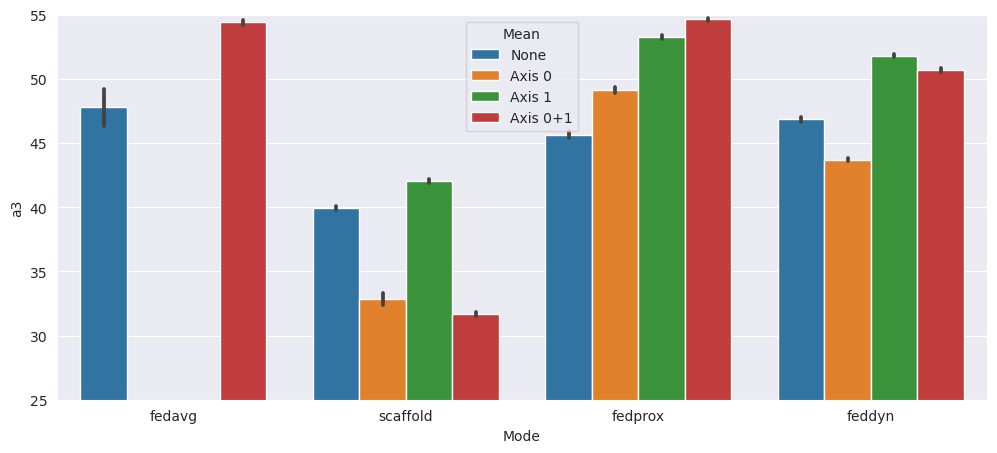

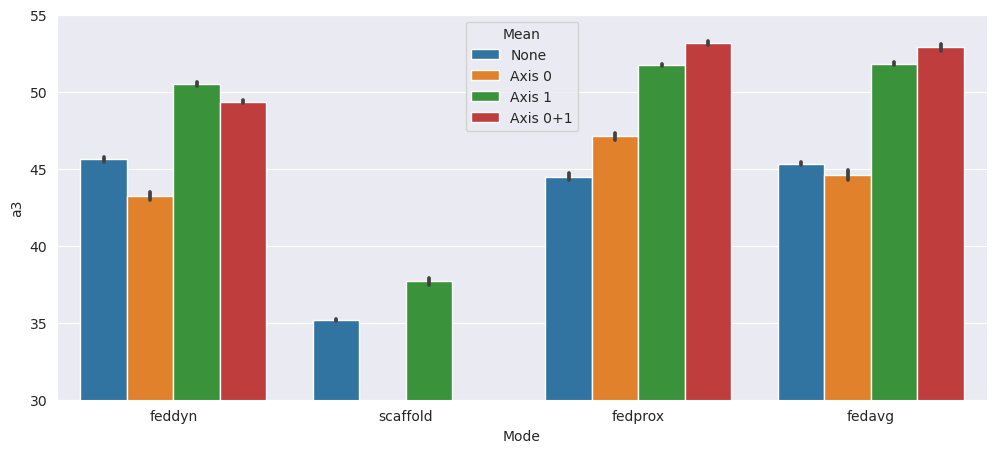

In [41]:
data_temp = load_data("../Output/CIFAR100-*-N100-*/s[1-9].csv")
sk = ["None", "Axis 0", "Axis 1", "Axis 0+1"]
data_temp = data_temp.set_index('Mean').loc[sk].reset_index()

fig, axes = plt.subplots(1, 1, figsize=(12,5), dpi=100, sharey=False)
sns.set_style("darkgrid")
for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 999]
    print(temp.shape)
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    # ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="Mean", ax=ax, errorbar="se")
    ax.set_ylim(25,55)
    
fig, axes = plt.subplots(1, 1, figsize=(12,5), dpi=100, sharey=False)
sns.set_style("darkgrid")
for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 999]
    print(temp.shape)
    temp = temp[(temp["Distribution"] == "Balanced Dirichlet partition (α=0.3)")]
    # ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="Mean", ax=ax, errorbar="se")
    ax.set_ylim(30,55)

(52, 21)
(122, 21)


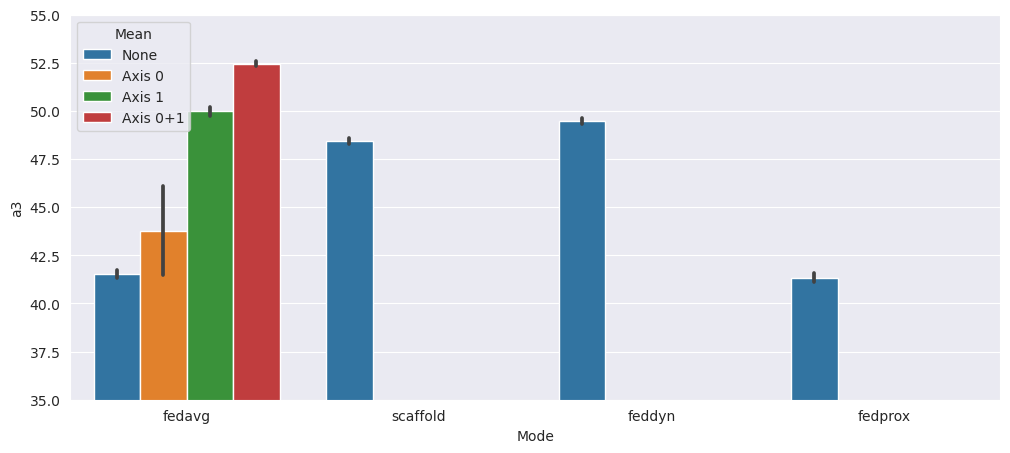

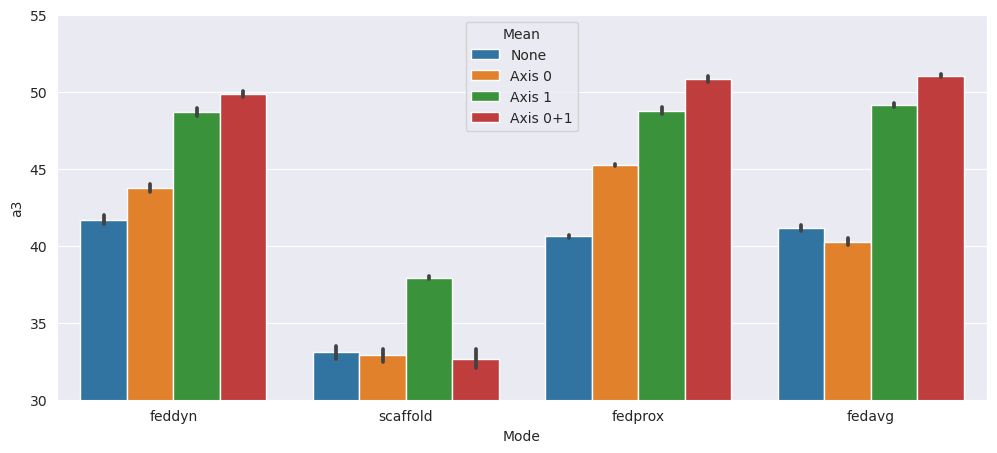

In [38]:
data_temp = load_data("../Output/CIFAR100-*-N100-*/s[1-9].csv")
sk = ["None", "Axis 0", "Axis 1", "Axis 0+1"]
data_temp = data_temp.set_index('Mean').loc[sk].reset_index()

fig, axes = plt.subplots(1, 1, figsize=(12,5), dpi=100, sharey=False)
sns.set_style("darkgrid")
for ax, ap, lr in zip([axes], [0.1], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 499]
    print(temp.shape)
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    # ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="Mean", ax=ax, errorbar="se")
    ax.set_ylim(35,55)
    
fig, axes = plt.subplots(1, 1, figsize=(12,5), dpi=100, sharey=False)
sns.set_style("darkgrid")
for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 499]
    print(temp.shape)
    temp = temp[(temp["Distribution"] == "Balanced Dirichlet partition (α=0.3)")]
    # ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="Mean", ax=ax, errorbar="se")
    ax.set_ylim(30,55)

(56, 21)
(56, 21)


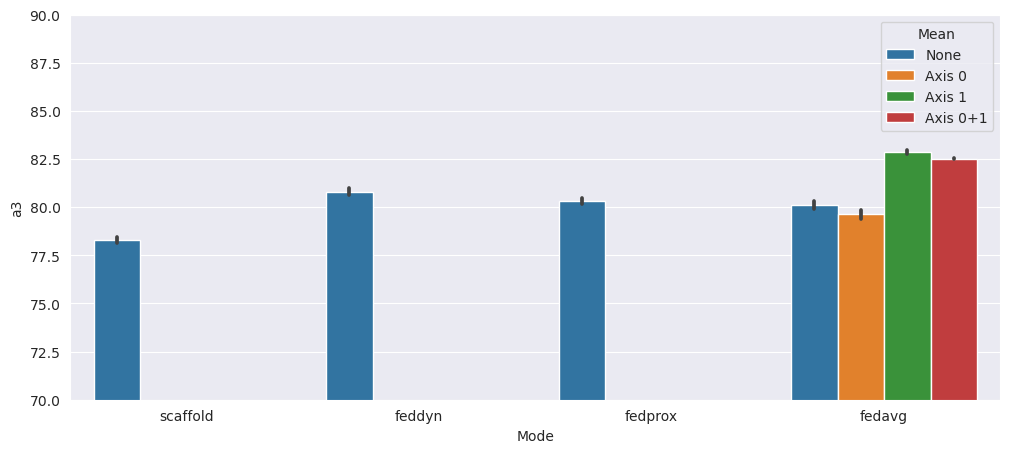

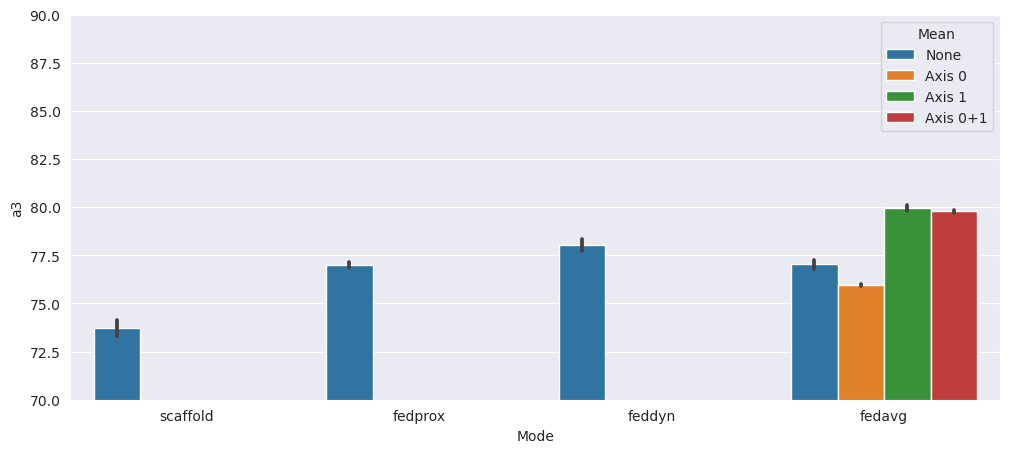

In [34]:
data_temp = load_data("../Output/CIFAR10-*-N100-*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

sk = ["None", "Axis 0", "Axis 1", "Axis 0+1"]
data_temp = data_temp.set_index('Mean').loc[sk].reset_index()

fig, axes = plt.subplots(1, 1, figsize=(12,5), dpi=100, sharey=False)
sns.set_style("darkgrid")
for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 499]
    # temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    print(temp.shape)
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    # ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="Mean", ax=ax, errorbar="se")
    ax.set_ylim(70,90)

fig, axes = plt.subplots(1, 1, figsize=(12,5), dpi=100, sharey=False)
sns.set_style("darkgrid")
for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 499]
    # temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    print(temp.shape)
    temp = temp[(temp["Distribution"] == "Balanced Dirichlet partition (α=0.3)")]
    # ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="Mean", ax=ax, errorbar="se")
    ax.set_ylim(70,90)

(86, 21)
(86, 21)


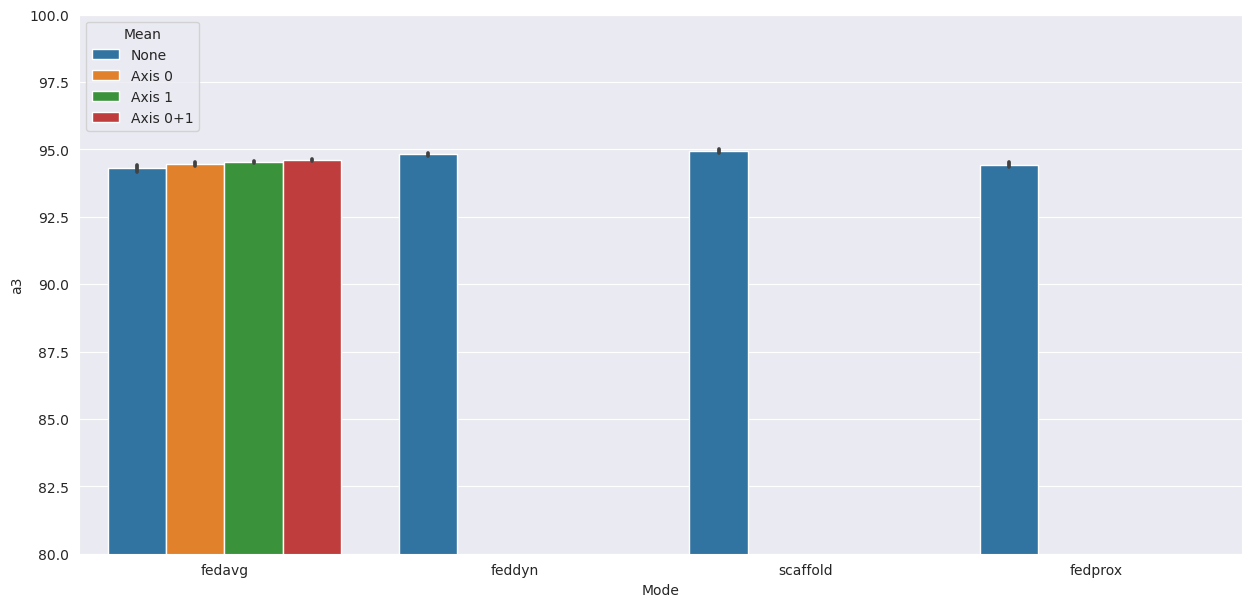

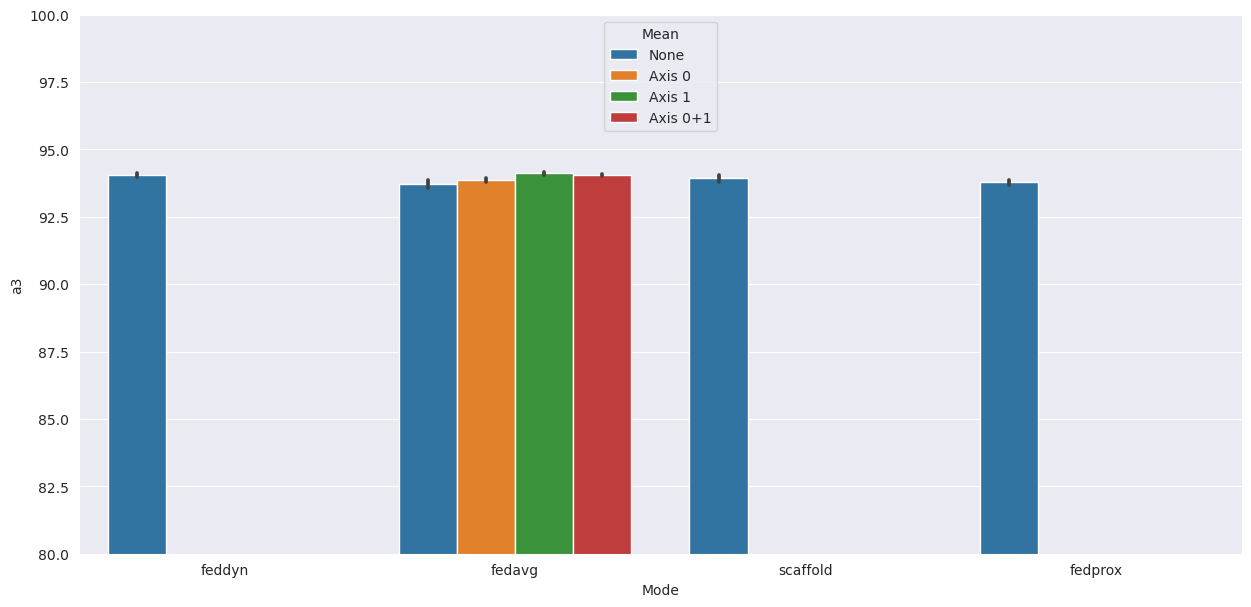

In [39]:
data_temp = load_data("../Output/emnist-*-N100-*/s[1-9].csv")


sk = ["None", "Axis 0", "Axis 1", "Axis 0+1"]
data_temp = data_temp.set_index('Mean').loc[sk].reset_index()

fig, axes = plt.subplots(1, 1, figsize=(15,7), dpi=100, sharey=False)
sns.set_style("darkgrid")
for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 499]
    # temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    print(temp.shape)
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    # ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="Mean", ax=ax, errorbar="se")
    ax.set_ylim(80,100)

fig, axes = plt.subplots(1, 1, figsize=(15,7), dpi=100, sharey=False)
sns.set_style("darkgrid")
for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 499]
    # temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    print(temp.shape)
    temp = temp[(temp["Distribution"] != "Balanced IID partition")]
    # ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="Mean", ax=ax, errorbar="se")
    ax.set_ylim(80,100)